In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [ ]:
#column['x','y']
dataset=pd.read_csv('ex1data1.csv')
print(dataset)
dataset.shape

          x         y
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


(97, 2)

In [ ]:
dataf=pd.DataFrame(dataset)
dataf.describe()#check nature of dataset

,x,y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
#separating x and y
x_value=dataf.iloc[0:97,0:1]

In [ ]:
y_value=dataf.iloc[0:97,1:2]

In [ ]:
x_value

,x
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
92,5.8707
93,5.3054
94,8.2934
95,13.3940


In [ ]:
y_value

,y
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


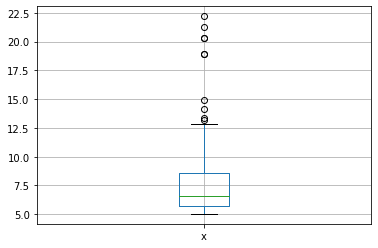

In [ ]:
x_box=x_value.boxplot(column=['x'])

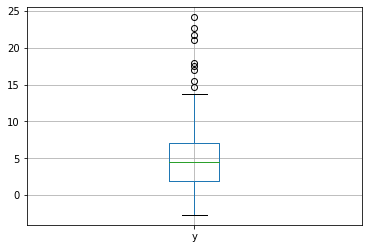

In [ ]:
y_box=y_value.boxplot(column=['y'])

Text(0.5, 1.0, 'Linear regression')

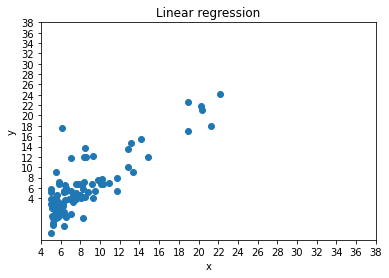

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_value,y_value)
plt.xticks(np.arange(4,40,step=2))
plt.yticks(np.arange(4,40,step=2))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression")

In [ ]:
#define hypothesis
def hypothesis(theta_array,x):
  return theta_array[0] + theta_array[1]*x

In [ ]:
def cost_function(theta_array,x,y,m):
  total_err=0
  for i in range(m):
    total_err+=(theta_array[0]+theta_array[1]*x[i]-y[i])**2

  return total_err/(2*m)



In [ ]:
def grad_desc(theta_array,x,y,alpha,m):
  summation_0=0
  summation_1=0

  for i in range(m):
    summation_0+=((theta_array[0]+theta_array[1]*x[i])-y[i])
    summation_1+=x[i]*((theta_array[0]+theta_array[1]*x[i])-y[i])

  new_theta_0=theta_array[0]-alpha*(summation_0)/m
  new_theta_1=theta_array[1]-alpha*(summation_1)/m

  updated_theta_array=[new_theta_0,new_theta_1]
  print(updated_theta_array)
  return updated_theta_array

In [ ]:
def training(x,y,alpha,iters):
  theta_0=0
  theta_1=0
  theta_array=[theta_0,theta_1]

  m=x.size #size of datasets
  cost_fun_values=[]

  for i in range(iters):
    theta_array=grad_desc(theta_array,x,y,alpha,m)

    cost_fun_values.append(cost_function(theta_array,x,y,m))
    if(i%5==0):
      y_new=x*theta_array[1]+theta_array[0] #linear regression line
      plt.plot(x,y_new,'r')
      plt.scatter(x,y)
      plt.show()

  x=np.arange(0,len(cost_fun_values),step=1)
  plt.plot(x,cost_fun_values,"-b")
  plt.xlabel("num of iter")
  plt.ylabel("cost/loss")
  plt.title("cost fun curve")
  plt.show()
  return theta_array


In [ ]:
training_data=pd.read_csv("ex1data1.csv")
cleaning_dataset=training_data.dropna() #drop observation for NaN


In [ ]:
cleaning_dataset

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
x_train=cleaning_dataset['x']

In [ ]:
y_train=cleaning_dataset['y']

In [ ]:
x_train.shape

(97,)

In [ ]:
x_value=x_train.values.reshape(x_train.size)

In [ ]:
y_train.shape

(97,)

In [ ]:
y_value=y_train.values.reshape(y_train.size)

[0.00583913505154639, 0.06532884974555674]


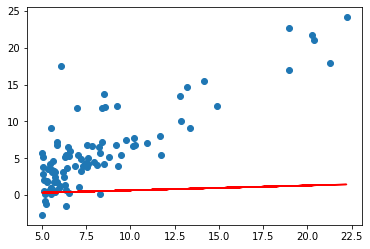

[0.011139360619887441, 0.12529202736760148]
[0.015944998425899793, 0.18033071712647958]
[0.020296725893411638, 0.23084982748785526]
[0.024231875796729214, 0.2772209738521627]
[0.02778471127004, 0.3197852160330555]


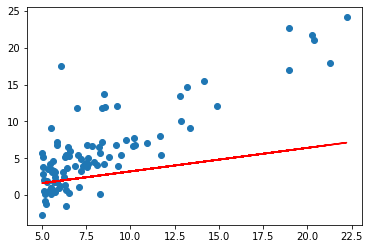

[0.030986678204529827, 0.3588555706502954]
[0.03386663689247941, 0.39471931694444373]
[0.036451074624730045, 0.42764011299897636]
[0.03876430080760266, 0.45785993795882146]
[0.04082862603658506, 0.4856008745525356]


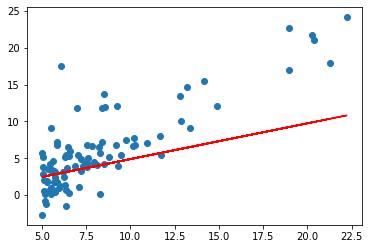

[0.042664526445921086, 0.5110667450489411]
[0.04429079454477121, 0.5344446126993831]
[0.045724677651068406, 0.5559061597258739]
[0.04698200494283254, 0.5756089520059764]
[0.048077304062857734, 0.5936975997706391]


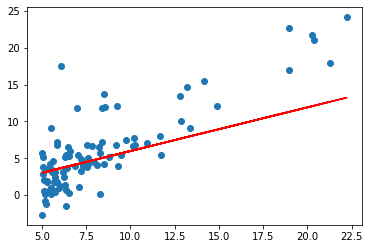

[0.049023908135732805, 0.6103048228651792]
[0.049834053985528176, 0.6255524284205842]
[0.050518972277662756, 0.6395522081370786]
[0.051088970248974554, 0.6524067617897299]
[0.05155350763542013, 0.6642102530223913]


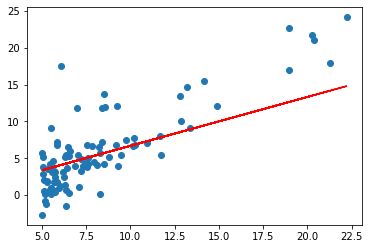

[0.051921266356718995, 0.6750491029974826]
[0.05220021447126981, 0.6850026270113305]
[0.05239766487245787, 0.694143618764652]
[0.052520329158736, 0.7025388865921656]
[0.0525743670743089, 0.7102497456014292]


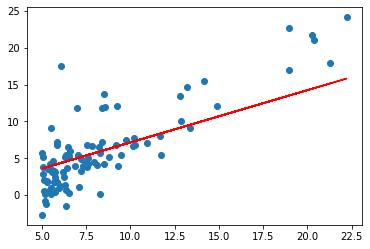

[0.05256543188462244, 0.7173324693462102]
[0.052498712020913, 0.7238387043616075]
[0.052378969300588635, 0.7298158506145683]
[0.052210574004989685, 0.7353074106723634]
[0.05199753707292674, 0.7403533101611427]


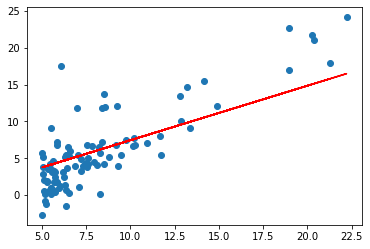

[0.05174353964714731, 0.7449901918752099]
[0.05145196019138322, 0.7492516857035473]
[0.05112589937773442, 0.7531686563619893]
[0.05076820292772052, 0.756769430755943]
[0.05038148257525685, 0.760080006648509]


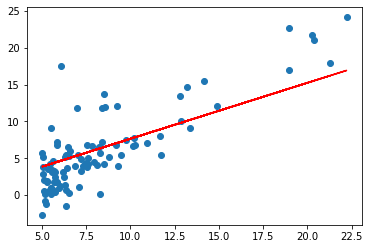

[0.049968135305977476, 0.7631242441711406]
[0.049530361014630216, 0.7659240415875909]
[0.04907017871061555, 0.7684994966059017]
[0.04858944139104649, 0.7708690544267254]
[0.04808984969089064, 0.7730496436185694]


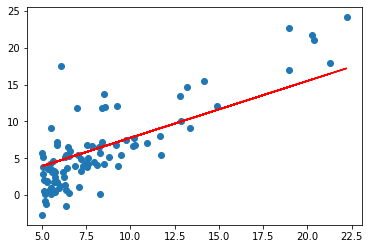

[0.04757296441074734, 0.7750568008208771]
[0.04704021801454479, 0.7769047851935621]
[0.04649292518185421, 0.7786066834560808]
[0.04593229249255382, 0.7801745062898046]
[0.04535942731518411, 0.7816192768138349]


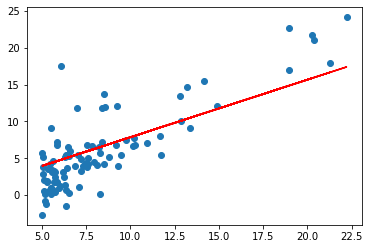

[0.04477534596446978, 0.7829511117860104]
[0.04418098118810022, 0.7841792961272681]
[0.043577189037919226, 0.7853123513183373]
[0.04296475517614033, 0.7863580981726055]
[0.04234440066304176, 0.7873237144475679]


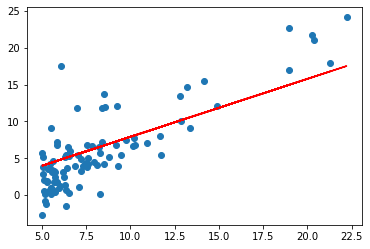

[0.04171678726877585, 0.7882157877192512]
[0.04108252234842192, 0.7890403639091077]
[0.04044216331619435, 0.7898029918208499]
[0.039796221751764775, 0.7905087640153012]
[0.03914516716894735, 0.7911623543243675]


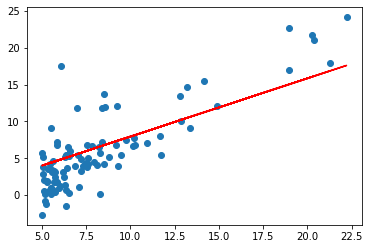

[0.03848943047450882, 0.7917680522804704]
[0.03782940714258252, 0.7923297947150665]
[0.03716546012807033, 0.7928511947590199]
[0.036497922540494, 0.7933355684584569]
[0.03582710009799258, 0.7937859592021674]


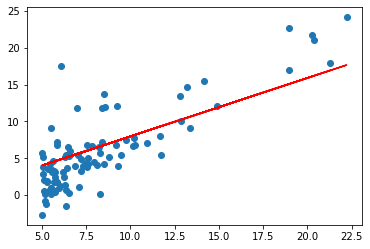

[0.03515327337954313, 0.7942051601404958]
[0.03447669989199556, 0.7945957347608668]
[0.03379761596714823, 0.794960035771517]
[0.033116238502839054, 0.7953002224325362]
[0.032432766560877596, 0.7956182764618862]


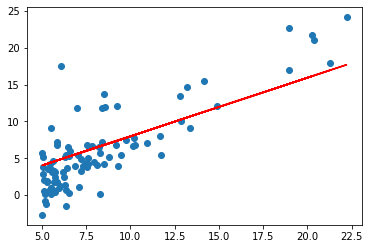

[0.03174738283358941, 0.7959160166335687]
[0.031060254989775618, 0.7961951121754777]
[0.030371536910002772, 0.7964570950656311]
[0.029681369820322625, 0.7967033713173615]
[0.02898988333277329, 0.7969352313365959]


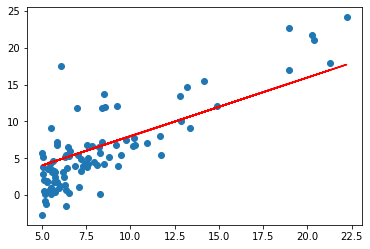

[0.028297196400326553, 0.797153859427523]
[0.027603418193315916, 0.7973603425166683]
[0.026908648903801482, 0.7975556781596447]
[0.026212980483797003, 0.7977407818895577]
[0.025516497322797184, 0.7979164939611982]


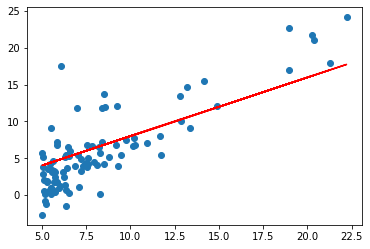

[0.024819276869596195, 0.7980835855407029]
[0.024121390202977964, 0.7982427643862776]
[0.02342290255548223, 0.7983946800618309]
[0.02272387379410461, 0.7985399287219237]
[0.022024358861471745, 0.7986790575032824]


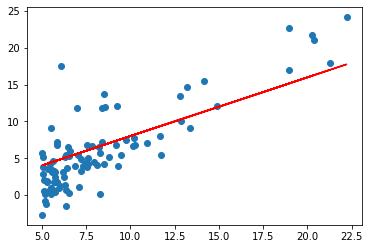

[0.021324408180741383, 0.7988125685552258]
[0.0206240680272101, 0.7989409227386953]
[0.019923380869366077, 0.7990645430211375]
[0.019222385681899226, 0.7991838175922467]
[0.018521118232974504, 0.7992991027235198]


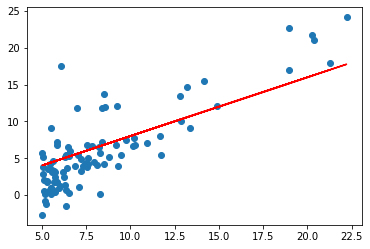

[0.017819611347884543, 0.7994107253926883]
[0.01711789515102379, 0.7995189856923591]
[0.01641599728796665, 0.7996241590406088]
[0.015713943129285514, 0.7997264982098141]
[0.015011755957610179, 0.799826235188665]


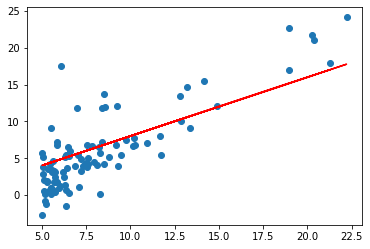

[0.014309457139306491, 0.7999235828910757]
[0.013607066282038977, 0.8000187367245831]
[0.012904601379378076, 0.8001118760297855]
[0.012202078943517245, 0.8002031654014254]
[0.011499514127077568, 0.8002927559008483]


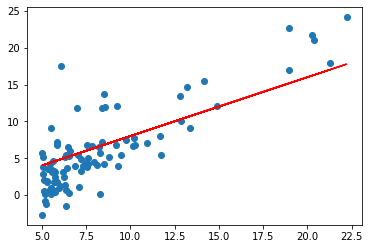

[0.01079692083489714, 0.8003807861687678]
[0.010094311826628724, 0.8004673834465367]
[0.009391698810901437, 0.8005526645134431]
[0.008689092531740134, 0.800636736546941]


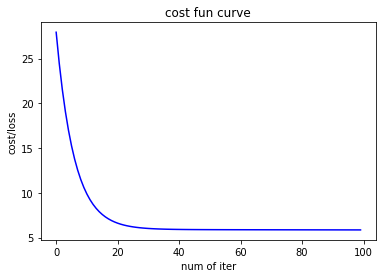

In [ ]:
alpha=0.001
iter=100
theta_array1=training(x_value,y_value,alpha,iter)

In [ ]:
theta_array1

[0.008689092531740134, 0.800636736546941]

In [ ]:
hypothesis(theta_array1,20.0)

16.02142382347056

In [ ]:
cost_function(theta_array1,x_value,y_value,97)

5.864868428785698

In [ ]:
X = np.array([np.ones(len(x_value)), x_value]).T     
Y = (y_value[:, np.newaxis])

In [ ]:
theta_array2 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)         
print(theta_array2)

[[-3.89578088]
 [ 1.19303364]]
